## EDA

In [1]:
# train_dataset을 불러오고 싶은 경우
from datasets import load_from_disk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = load_from_disk("/opt/ml/input/data/train_dataset/train/")
valid_dataset = load_from_disk("/opt/ml/input/data/train_dataset/validation/")
print(dataset)
print(valid_dataset)

Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 3952
})
Dataset({
    features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
    num_rows: 240
})


In [2]:
len(dataset)

3952

In [3]:
def make_pandas(json_file) :
    id_list,doc_list, title_list ,context_list, question_list, answer_start_list,answer_text_list = [],[],[],[],[],[],[]
    for i in range(len(dataset)) :
        id_list.append(json_file[i]['id'])
        doc_list.append(json_file[i]['document_id'])
        title_list.append(json_file[i]['title'])
        context_list.append(json_file[i]['context'])
        question_list.append(json_file[i]['question'])
        answer_start_list.append(json_file[i]['answers']['answer_start'][0])
        answer_text_list.append(json_file[i]['answers']['text'][0])

    new_df = pd.DataFrame({"id" : id_list, 'document_id':doc_list, "title" : title_list, "context" : context_list, "question" : question_list, "answer_start" : answer_start_list,"answer_text" : answer_text_list})
    return new_df

In [4]:
df = make_pandas(dataset)

In [5]:
df.head()

,id,document_id,title,context,question,answer_start,answer_text
0,mrc-1-000067,18293,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,235,하원
1,mrc-0-004397,51638,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,212,《경영의 실제》
2,mrc-1-000362,5028,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,510,백성
3,mrc-0-001510,34146,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,625,중국
4,mrc-0-000823,47334,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,30,4개


In [6]:
# 결측치 x
df.isnull().sum()

id              0
document_id     0
title           0
context         0
question        0
answer_start    0
answer_text     0
dtype: int64

In [7]:
# 중복 x
df.duplicated

<bound method DataFrame.duplicated of                 id  document_id              title  \
0     mrc-1-000067        18293              미국 상원   
1     mrc-0-004397        51638             인사조직관리   
2     mrc-1-000362         5028                강희제   
3     mrc-0-001510        34146             금동삼존불감   
4     mrc-0-000823        47334            계사명 사리구   
...            ...          ...                ...   
3947  mrc-0-005285         8275            이오 (위성)   
3948  mrc-1-000699        37764            내니 다이어리   
3949  mrc-0-003429        12730        빈 필하모니 관현악단   
3950  mrc-0-003956        10924                드래곤   
3951  mrc-0-003589        27803  2011년 함부르크 주의회 선거   

                                                context  \
0     미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...   
1     '근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...   
2     강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...   
3     불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...   
4     동아대학교박물관에서 소

In [8]:
df['answer_start']

0       235
1       212
2       510
3       625
4        30
       ... 
3947    317
3948    616
3949    255
3950    476
3951    189
Name: answer_start, Length: 3952, dtype: int64

In [53]:
# histgraph 그리기
def make_hist(data,graph_name, plot_type = None) :
    if plot_type == "hist" :
        plt.figure(figsize = (10,5))
        data.hist(bins = 50)
        plt.title(f'{graph_name} histogram')
        plt.show()
    elif plot_type == "plot" :
        plt.figure(figsize = (10,5))
        sns.distplot(data)
        plt.title(f'{graph_name} distplot')
        plt.show()

In [56]:
df.describe()

,document_id,answer_start,len_context
count,3952.000000,3952.000000,3952.000000
mean,28399.783401,376.794028,920.220648
std,17475.051830,309.122555,356.500514
min,4572.000000,0.000000,512.000000
25%,11615.750000,138.000000,645.000000
50%,26295.000000,310.000000,819.000000
75%,44240.250000,538.000000,1099.250000
max,60603.000000,1974.000000,2059.000000


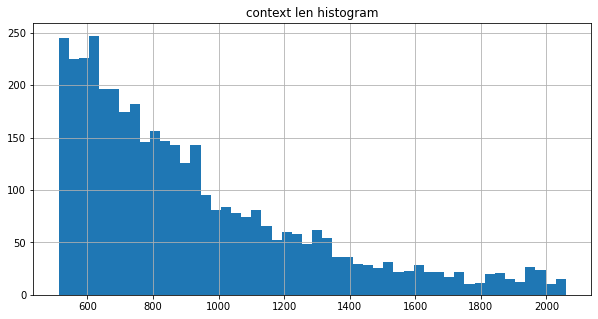

In [89]:
# context 길이 분포
df['len_context']= df.context.apply(lambda x : len(x))
make_hist(df.len_context, 'context len','hist')

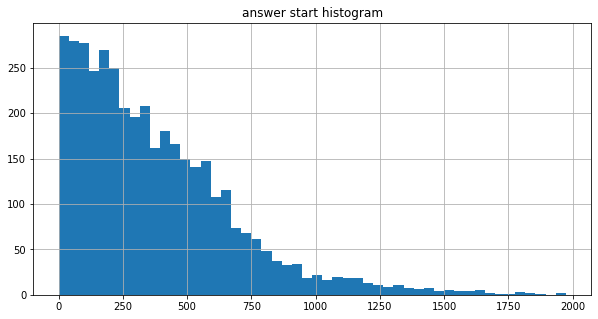

In [90]:
# 정답이 시작하는 위치 분포
make_hist(df['answer_start'],'answer start','hist')

In [64]:
df.answer_text.apply(lambda x : p.findall(x))

0              []
1       [《,  , 》]
2              []
3              []
4             [4]
          ...    
3947          [ ]
3948           []
3949          [ ]
3950          [ ]
3951          [ ]
Name: answer_text, Length: 3952, dtype: object

In [73]:
import re
p = re.compile('[^a-zA-Z가-힣0-9]')

string_list = []
for i in range(len(df)) :
    if p.findall(df.context[i]) == [] :
        pass
    else :
        string_list.append(df['context'][i])

In [74]:
ds = pd.DataFrame(list(set(string_list)))
#ds.to_csv('noname_context.csv' , encoding = 'utf-8-sig')

In [78]:
df.title.value_counts()

윤치호          43
장면           24
여운형          23
데카메론의 줄거리    13
근대           13
             ..
과학적 제어        1
아이톨리아 동맹      1
핀란드 사회민주당     1
페레스트로이카       1
고도역 (군마현)     1
Name: title, Length: 2716, dtype: int64

In [81]:
df[df['title'] == '윤치호']

,id,document_id,title,context,question,answer_start,answer_text,len_context
19,mrc-1-000027,5322,윤치호,"혹자는 윤치호의 직계선조인 윤근수, 윤두수로 그의 문중은 당색으로는 서인 소론 계열...",윤치호가 극찬했던 조선시대의 인물은 누구인가요?,585,다산 정약용,783
171,mrc-0-000606,5295,윤치호,"1903년 1월 함경도 안핵사로 임명되어 함경남도 함흥에 파견되었고, 7월 천안군수...",윤치호가 중앙 정계에서 다시 활동하기 전에 일어난 전투는?,616,러일전쟁,918
201,mrc-0-001069,5284,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...",평상시 기독교선교사들로부터 차별적 대우를 받은 윤치호가 생각한 미국의 중대한 속성은?,645,인종주의,1146
294,mrc-0-000980,5342,윤치호,서재필이 배재학당의 젊은 학생들과 애국적인 시민을 독립협회로 모으는 데 기여했다면 ...,서재필은 어디에서 공부하는 학생들을 독립협회로 모이게 했나요?,5,배재학당,1003
415,mrc-0-004643,5289,윤치호,1895년 귀국 직후부터 그는 영어 실력을 바탕으로 그는 조선을 방문한 선교사들의 ...,윤치호가 아버지 윤웅렬을 설득해 교회와 학교를 지을 땅을 제공했던 선교사의 이름은?,77,조세핀 애턴 캠밸,1811
583,mrc-0-002799,5321,윤치호,"1935년 조만식, 김성수의 주도로 고희연이 성대히 개최되었다. 이광수 등이 참석했...",이정무의 아들이 이화여전의 이사에 앉은 것은 몇년도인가?,708,1936년,919
985,mrc-0-003165,5321,윤치호,"1935년 조만식, 김성수의 주도로 고희연이 성대히 개최되었다. 이광수 등이 참석했...",일본인들에게 송도고보는 일본의 어느 학교보다 더 크다고 소문났나?,849,와세다 대학,919
996,mrc-0-002792,5307,윤치호,"3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명...",윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?,1122,“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통...,1633
1050,mrc-0-004613,5282,윤치호,그러나 다시 1891년 미국 조지아 주 옥스퍼드에 정착한 뒤 다시 에모리 대학(Em...,윤치호는 서재필을 찾아간 후 어느 지역으로 갔나?,317,상하이,1000
1073,mrc-0-003659,5281,윤치호,그는 곧 밴더빌트 대학교 신학부에 입학하였다. 밴더빌트 대학교 재학 중에 그는 감옥...,윤치호가 조지아주에서 재입학한 학교는?,1206,에모리 대학(Oxford College of Emory University),1410


In [87]:
df[df['document_id'].duplicated()][:50]

,id,document_id,title,context,question,answer_start,answer_text,len_context
68,mrc-0-001698,14083,이범래 (1868년),1894년 장위영 영관을 지낸 무관이었다. 1896년 명성황후가 일본인 낭인들에게 ...,을미사변 직후에 이범래는 무엇에 임명되었나요?,144,새로 조직된 훈련대의 제1대 대대장,1033
292,mrc-0-005237,31222,마리아 발토르타,하느님이시요 사람이신 그리스도의 시\n1943년부터 1951년까지 마리아 발토르타는...,마리아는 어느 나라에 계속 머물러 있었나요?,706,이탈리아,991
320,mrc-0-005401,53017,연병환,1878년 10월 21일 조선 충청북도 증평에서 태어난 그는 형제로는 독립운동가 연...,연병호의 형제가 사망한 날짜는?,1327,1926년 5월 14일,1360
327,mrc-0-002297,8428,선언형 프로그래밍,"선언형 프로그래밍은 두 가지 뜻으로 통용되고 있다.\n\n한 정의에 따르면, 프로그...","논리형, 제한형 프로그래밍 언어와 대조되는 것은?",510,명령형 언어,1202
337,mrc-0-005356,9868,김용준 (1904년),경북 선산에서 태어나 경성부의 중앙고등보통학교를 졸업했다. 화가 이종우에게 수학한 ...,조선미술가동맹 조선화분과에서 김용준이 맡은 직책은?,680,위원장,1311
384,mrc-0-001471,34532,투스카로라 전쟁,"1711년 가을, 핸콕 추장이 이끄는 남부 투스카로라 족은 팸플리코 족, 코세치니 ...",1712년에 남부 투스카로라 족은 누가 이끄는 부대로부터 공격을 받았는가?,314,존 반웰 대령,905
419,mrc-0-001169,51769,스토우빌선,스토우빌선 열차를 처음 운행할 때는 6량으로 시작하였다 두 번째 열차가 추가될 때에...,링컨빌에 차량 기지를 추가로 만든 이유는 무엇이 필요했기 때문인가?,94,추가 운행할 열차를 정박할 공간,751
430,mrc-0-001423,8724,레드볼 익스프레스,"레드볼 익스프레스(Red Ball Express)는 노르망디 상륙작전 이후, 연합군...",노르망디 상륙 이후 등장한 보급대는?,372,리틀 레드볼 익스프레스,1202
452,mrc-1-000792,40757,이스라엘의 동성결혼,이스라엘의 보수 우파 정당인 리쿠드의 동성결혼에 관한 공식 입장은 아직 정해지지 않...,"키에스콤파스에 따르면 동성결혼 분야에서 리쿠드당, 베이테이누당과 정반대 성향을 보이...",358,유대인의 집,539
464,mrc-0-004374,37482,용아병,델포이의 신탁에 따라 암소를 따라간 카드모스는 테베 땅에 이르렀다. 카드모스는 암소...,카드모스는 누구의 시중을 드는 형을 받았나?,454,아레스,677


In [86]:
df[df['context'].duplicated()][:50]

,id,document_id,title,context,question,answer_start,answer_text,len_context
68,mrc-0-001698,14083,이범래 (1868년),1894년 장위영 영관을 지낸 무관이었다. 1896년 명성황후가 일본인 낭인들에게 ...,을미사변 직후에 이범래는 무엇에 임명되었나요?,144,새로 조직된 훈련대의 제1대 대대장,1033
292,mrc-0-005237,31222,마리아 발토르타,하느님이시요 사람이신 그리스도의 시\n1943년부터 1951년까지 마리아 발토르타는...,마리아는 어느 나라에 계속 머물러 있었나요?,706,이탈리아,991
320,mrc-0-005401,53017,연병환,1878년 10월 21일 조선 충청북도 증평에서 태어난 그는 형제로는 독립운동가 연...,연병호의 형제가 사망한 날짜는?,1327,1926년 5월 14일,1360
327,mrc-0-002297,8428,선언형 프로그래밍,"선언형 프로그래밍은 두 가지 뜻으로 통용되고 있다.\n\n한 정의에 따르면, 프로그...","논리형, 제한형 프로그래밍 언어와 대조되는 것은?",510,명령형 언어,1202
337,mrc-0-005356,9868,김용준 (1904년),경북 선산에서 태어나 경성부의 중앙고등보통학교를 졸업했다. 화가 이종우에게 수학한 ...,조선미술가동맹 조선화분과에서 김용준이 맡은 직책은?,680,위원장,1311
384,mrc-0-001471,34532,투스카로라 전쟁,"1711년 가을, 핸콕 추장이 이끄는 남부 투스카로라 족은 팸플리코 족, 코세치니 ...",1712년에 남부 투스카로라 족은 누가 이끄는 부대로부터 공격을 받았는가?,314,존 반웰 대령,905
419,mrc-0-001169,51769,스토우빌선,스토우빌선 열차를 처음 운행할 때는 6량으로 시작하였다 두 번째 열차가 추가될 때에...,링컨빌에 차량 기지를 추가로 만든 이유는 무엇이 필요했기 때문인가?,94,추가 운행할 열차를 정박할 공간,751
430,mrc-0-001423,8724,레드볼 익스프레스,"레드볼 익스프레스(Red Ball Express)는 노르망디 상륙작전 이후, 연합군...",노르망디 상륙 이후 등장한 보급대는?,372,리틀 레드볼 익스프레스,1202
452,mrc-1-000792,40757,이스라엘의 동성결혼,이스라엘의 보수 우파 정당인 리쿠드의 동성결혼에 관한 공식 입장은 아직 정해지지 않...,"키에스콤파스에 따르면 동성결혼 분야에서 리쿠드당, 베이테이누당과 정반대 성향을 보이...",358,유대인의 집,539
464,mrc-0-004374,37482,용아병,델포이의 신탁에 따라 암소를 따라간 카드모스는 테베 땅에 이르렀다. 카드모스는 암소...,카드모스는 누구의 시중을 드는 형을 받았나?,454,아레스,677
